In [1]:
%%capture
!pip install langchain_core langchain langchain_community langgraph langchain-google-genai

In [2]:
%%capture
!pip install tavily-python

In [ ]:
import os

os.environ["GOOGLE_API_KEY"]=google_api_key

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

model_name="gemini-1.5-flash-latest"

In [5]:
llm=ChatGoogleGenerativeAI(model=model_name)


In [6]:
llm.invoke("what is llm?")

AIMessage(content="LLM stands for **Large Language Model**.  It's a type of artificial intelligence (AI) that's trained on massive amounts of text data.  This training allows it to understand, generate, and translate human language.  LLMs can perform a wide range of tasks, including:\n\n* **Text generation:** Writing stories, articles, summaries, and code.\n* **Translation:** Converting text from one language to another.\n* **Question answering:** Providing answers to questions based on its training data.\n* **Chatbots:** Engaging in conversations with users.\n* **Summarization:** Condensing large amounts of text into shorter summaries.\n\nEssentially, LLMs are sophisticated pattern-matching machines.  They learn statistical relationships between words and phrases to predict the most likely next word in a sequence, allowing them to generate coherent and contextually relevant text.  Examples of LLMs include GPT-3, LaMDA, and PaLM.", additional_kwargs={}, response_metadata={'prompt_feedb

In [7]:
""" llm need
Brief Generation
"""

' llm need\nBrief Generation\n'

In [8]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated,List
import operator

class ResearchState(TypedDict):
      research_topic:str
      sub_queries:Annotated[List[str],operator.add]
      raw_findings:Annotated[List[str],operator.add]
      synthesized_findings:Annotated[List[str],operator.add]
      final_report:str

In [9]:
workflow=StateGraph(ResearchState)

In [10]:
planner_llm=ChatGoogleGenerativeAI(
    model=model_name,
    temperature=0
    )
researcher_llm=ChatGoogleGenerativeAI(
    model=model_name,
    temperature=0
    )
synthesis_llm=ChatGoogleGenerativeAI(
    model=model_name,
    temperature=0
    )
evaluation_llm=ChatGoogleGenerativeAI(
    model=model_name,
    temperature=0
    )

In [11]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

template="""
  You are an ai agent .you are expert in understanding the intent of  user-supplied topic or query.
  You are an ai for making plan for doing a research.
  Your job is to do  interpretation  of the topic to fully grasp the user's intent and scope .
    then
    break down complex research topic into smaller, manageable sub-queries.
  Generate 3 sub-queries based on the topic.
  Dont generate more than 3 sub-queries.
  Dont generate any other thing.
  no explaination required.
    # formulates a comprehensive research strategy,

  here is the Research topic provided by user :{topic}
  output:


  """
prompt=ChatPromptTemplate.from_template(template)

chain=prompt| planner_llm | StrOutputParser()

res=chain.invoke("The Impact of Artificial Intelligence on the Future of Work.")

In [28]:
# res

'1. How will AI-driven automation affect job displacement and creation across various sectors?\n2. What are the ethical implications of AI in the workplace, including bias, fairness, and accountability?\n3. How can workers adapt and reskill to thrive in an AI-driven workforce?'

In [12]:
text_with_newlines = """
1. What are the potential benefits and drawbacks of AI adoption in various industries?
2. How will AI-driven automation affect employment rates and the demand for different skills?
3. What are the ethical considerations and societal implications of a workforce increasingly reliant on AI?
"""

# Split the text into a list of sentences and remove leading/trailing whitespace
sentences = [line.strip() for line in text_with_newlines.strip().splitlines()]

# Print the list of sentences
print(sentences)

['1. What are the potential benefits and drawbacks of AI adoption in various industries?', '2. How will AI-driven automation affect employment rates and the demand for different skills?', '3. What are the ethical considerations and societal implications of a workforce increasingly reliant on AI?']


In [13]:
res.split("\n")

['1. How will AI-driven automation affect job displacement and creation across various sectors?',
 '2. What are the ethical implications of AI in the workplace, including bias, fairness, and accountability?',
 '3. How can workers adapt and reskill to thrive in an AI-driven workforce?']

In [36]:
template="""
  You are an ai agent .you are expert making  strategy for a user-supplied topic or query.
  You are an ai for making plan for doing a research.
  Your job is formulates a comprehensive research strategy for the given topic.
  Dont generate any other thing.
  no explaination required.
  only generate the strategy.

  here is the Research topic provided by user :{topic}
  output:
  """
prompt=ChatPromptTemplate.from_template(template)

chain=prompt| planner_llm | StrOutputParser()

res=chain.invoke("The Impact of Artificial Intelligence on the Future of Work.")

In [37]:
# res

In [14]:

def planning_node(state:ResearchState)->ResearchState:
  """ Query Understanding and Planning"""
  topic=state['research_topic']
  template="""
  You are an ai agent .you are expert in understanding the intent of  user-supplied topic or query.
  You are an ai for making plan for doing a research.
  Your job is to do  interpretation  of the topic to fully grasp the user's intent and scope .
    then
    break down complex research topic into smaller, manageable sub-queries.
  Generate 3 sub-queries based on the topic.
  Dont generate more than 3 sub-queries.
  Dont generate any other thing.
  no explaination required.


  here is the Research topic provided by user :{topic}
  output:


  """
  prompt=ChatPromptTemplate.from_template(template)

  chain=prompt| planner_llm

  sub_queries=chain.invoke({"topic":topic}).content
  state['sub_queries']=sub_queries.split("\n")
  return state


In [ ]:
import os
from langchain_community.tools import TavilySearchResults

# It's recommended to set the API key as an environment variable
os.environ["TAVILY_API_KEY"] = ""

tool = TavilySearchResults()



/tmp/ipython-input-15-1377022595.py:7: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tool = TavilySearchResults()


In [16]:
tool.invoke("who is the current prime minister of india.")[0]['content']

'Narasimha Rao, Atal Bihari Vajpayee, Manmohan Singh, and Narendra Modi, who is the current prime minister of India, serving since 26 May 2014. He is the'

In [42]:
# res

['1. How will AI-driven automation affect job displacement and creation across various sectors?',
 '2. What are the ethical implications of AI in the workplace, including bias, fairness, and accountability?',
 '3. How can workers adapt and reskill to thrive in an AI-driven workforce?']

In [43]:
# res[0]

'1. How will AI-driven automation affect job displacement and creation across various sectors?'

In [17]:
def websearch(state:ResearchState)->ResearchState:
  """ websearch"""
  topic=state['research_topic']
  sub_querie_1=state['sub_queries'][0]
  sub_querie_2=state['sub_queries'][1]
  sub_querie_3=state['sub_queries'][2]

  reponse_1=tool.invoke(sub_querie_1)[0]['content']
  reponse_2=tool.invoke(sub_querie_2)[0]['content']
  reponse_3=tool.invoke(sub_querie_3)[0]['content']
  state['raw_findings']=[reponse_1,reponse_2,reponse_3]
  return state



'1. How will AI-driven automation affect job displacement and creation across various sectors?'

In [75]:
reponse_1=tool.invoke(res[0])[0]['content']

In [76]:
reponse_1

'On one hand, AI and automation have replaced certain roles, particularly those involving repetitive or routine tasks. This shift has led to job displacement in various industries, redefining traditional employment structures.\n\nOn the other hand, AI is also a powerful driver of job creation. It has paved the way for new roles — like AI ethicist and machine learning engineer — that didn’t exist just a few years ago. [...] AI continues to have a significant impact on jobs across various industries. While it can automate routine and repetitive tasks, leading to job displacement in certain sectors, it also creates new opportunities by enhancing productivity and enabling the development of entirely new roles.\n\n#### How will artificial intelligence affect the workplace? [...] AI has a significant impact on the job market, leading to both job displacement and the creation of new roles. It also affects hiring processes and demands new skills from professionals to stay relevant.\n\nAI educa

In [77]:
rs=[reponse_1,reponse_1]

In [78]:
rs[0]

'On one hand, AI and automation have replaced certain roles, particularly those involving repetitive or routine tasks. This shift has led to job displacement in various industries, redefining traditional employment structures.\n\nOn the other hand, AI is also a powerful driver of job creation. It has paved the way for new roles — like AI ethicist and machine learning engineer — that didn’t exist just a few years ago. [...] AI continues to have a significant impact on jobs across various industries. While it can automate routine and repetitive tasks, leading to job displacement in certain sectors, it also creates new opportunities by enhancing productivity and enabling the development of entirely new roles.\n\n#### How will artificial intelligence affect the workplace? [...] AI has a significant impact on the job market, leading to both job displacement and the creation of new roles. It also affects hiring processes and demands new skills from professionals to stay relevant.\n\nAI educa

In [79]:
rs[1]

'On one hand, AI and automation have replaced certain roles, particularly those involving repetitive or routine tasks. This shift has led to job displacement in various industries, redefining traditional employment structures.\n\nOn the other hand, AI is also a powerful driver of job creation. It has paved the way for new roles — like AI ethicist and machine learning engineer — that didn’t exist just a few years ago. [...] AI continues to have a significant impact on jobs across various industries. While it can automate routine and repetitive tasks, leading to job displacement in certain sectors, it also creates new opportunities by enhancing productivity and enabling the development of entirely new roles.\n\n#### How will artificial intelligence affect the workplace? [...] AI has a significant impact on the job market, leading to both job displacement and the creation of new roles. It also affects hiring processes and demands new skills from professionals to stay relevant.\n\nAI educa

In [18]:
def researcher_node(state:ResearchState)->ResearchState:
  """ researcher_node"""
  topic=state['research_topic']
  raw_findings_1=state['raw_findings'][0]
  raw_findings_2=state['raw_findings'][0]
  raw_findings_3=state['raw_findings'][1]
  template="""
You are a research assistant. Your task is to synthesize the provided web findings into a detailed explanation for a research paper.

**Topic:** {topic}

**Web Findings:**
{web_findings}

**Instructions:**
- Provide a detailed explanation of the topic based on the web findings.
- The explanation should be suitable for inclusion in a research paper.
- Focus on clarity, accuracy, and depth of information.
- Do not generate a formal report with sections like "Introduction" or "Conclusion".
-use simple english
- word limit should be 100


**Output:**
"""

  prompt=ChatPromptTemplate.from_template(template)
  chain=prompt| researcher_llm

  response_1=chain.invoke({"topic":topic,"web_findings":raw_findings_1}).content

  response_2=chain.invoke({"topic":topic,"web_findings":raw_findings_3}).content

  response_3=chain.invoke({"topic":topic,"web_findings":raw_findings_2}).content

  synthesized_findings=[response_1,response_2,response_3]
  state['synthesized_findings']=synthesized_findings
  return state

In [81]:
# template="""
# You are a research assistant. Your task is to synthesize the provided web findings into a detailed explanation for a research paper.

# **Topic:** {topic}

# **Web Findings:**
# {web_findings}

# **Instructions:**
# - Provide a detailed explanation of the topic based on the web findings.
# - The explanation should be suitable for inclusion in a research paper.
# - Focus on clarity, accuracy, and depth of information.
# - Do not generate a formal report with sections like "Introduction" or "Conclusion".
# -use simple english
# - word limit should be 100


# **Output:**
# """
# prompt=ChatPromptTemplate.from_template(template)
# topic="The Impact of Artificial Intelligence on the Future of Work."

# web_findings_1=tool.invoke(res[0])
# web_findings_2=tool.invoke(res[1])
# web_findings_3=tool.invoke(res[2])

# chain=prompt| synthesis_llm
# response_1=chain.invoke({"topic":topic,"web_findings":web_findings_1[0]['content']}).content

# response_2=chain.invoke({"topic":topic,"web_findings":web_findings_2[0]['content']}).content

# response_3=chain.invoke({"topic":topic,"web_findings":web_findings_3[0]['content']}).content

In [69]:
res[0]

'1. How will AI-driven automation affect job displacement and creation across various sectors?'

In [70]:
res[1]

'2. What are the ethical implications of AI in the workplace, including bias, fairness, and accountability?'

In [71]:
res[2]

'3. How can workers adapt and reskill to thrive in an AI-driven workforce?'

In [66]:
response_1

"Artificial intelligence's impact on the future of work is dual-faceted.  While AI-driven automation displaces workers in roles involving repetitive tasks, leading to job losses in some sectors, it simultaneously creates new job opportunities.  These new roles, such as AI ethicists and machine learning engineers, are directly related to the development, implementation, and ethical considerations surrounding AI technologies.  This transformative effect necessitates workforce adaptation, demanding new skills and prompting the rise of specialized education programs to prepare individuals for the evolving job market.  The net effect is a reshaping of the workplace, requiring both individuals and industries to navigate this complex shift."

In [67]:
response_2

'Artificial intelligence (AI) significantly impacts the future of work, but its implementation raises crucial ethical concerns.  AI systems trained on biased data can perpetuate and amplify existing societal biases, leading to unfair outcomes in areas like hiring and loan applications.  This necessitates a comprehensive approach involving collaboration between technologists, ethicists, and policymakers to develop ethical guidelines, regulations, and best practices.  The goal is to ensure AI benefits humanity while mitigating harm and promoting fairness and accountability in its application.  Addressing these biases is vital for responsible AI development and deployment.'

In [68]:
response_3

'Artificial intelligence (AI) is significantly impacting the future of work, creating both anxieties and opportunities.  While a Gallup survey reveals that 22% of workers fear job obsolescence due to AI, and 72% of Chief Human Resource Officers anticipate AI-driven job displacement within three years,  AI also presents a chance for growth through upskilling and reskilling initiatives.  These programs equip employees with the skills needed to adapt to AI-driven changes, allowing them to transition to new roles or enhance their existing performance by focusing on higher-value tasks freed from automation.  Therefore, proactive investment in employee development is crucial to mitigate the negative impacts of AI and harness its potential for workforce advancement.'

In [ ]:
# def Research(state:ResearchState)->ResearchState:
#   """ Research"""
#   topic=state['research_topic']
#   raw_findings=state['raw_findings']
#   raw_findings_1=state['raw_findings'][0]
#   raw_findings_2=state['raw_findings'][1]
#   raw_findings_3=state['raw_findings'][2]

#   response_1=researcher_llm.invoke(sub_querie_1)
#   response_2=researcher_llm.invoke(sub_querie_2)
#   response_3=researcher_llm.invoke(sub_querie_3)
#   state['raw_findings']=[response_1,response_2,response_3]
#   return state

In [19]:
def synthesis_node(state:ResearchState)->ResearchState:
  """ final_generation_node"""
  topic=state['research_topic']
  synthesized_findings=state['synthesized_findings']

  final_prompt = """
You are a research paper author. Your task is to write a detailed research paper on the given topic by synthesizing the provided research findings.

**Topic:** {topic}

**Research Findings:**
- **Finding 1:** {response_1}
- **Finding 2:** {response_2}
- **Finding 3:** {response_3}

**Instructions:**
- Write a comprehensive research paper that integrates all three findings.
- The paper must be well-structured, coherent, and written in a formal academic style.
- Ensure a logical flow between sections.
- Adhere to the following rules for academic writing:
    - **Clarity:** The language should be clear, concise, and unambiguous.
    - **Objectivity:** Present information factually and avoid personal opinions or biased language.
    - **Evidence-based:** Support all claims with evidence from the provided findings.
    - **Formal Tone:** Maintain a formal and professional tone throughout the paper.

**Format:**
- **Introduction:** Provide an overview of the topic, its significance, and the main points to be discussed.
- **Section 1:
- **Section 2:
- **Section 3:
- **Conclusion:** Summarize the key arguments and provide a concluding statement .

**Output:**
"""
  prompt=ChatPromptTemplate.from_template(final_prompt)
  chain=prompt| synthesis_llm
  final_report=chain.invoke({"topic":topic,
                             "response_1":synthesized_findings[0],
                             "response_2":synthesized_findings[1],
                             "response_3":synthesized_findings[2]}).content

  state['final_report']=final_report
  return state





In [72]:
# # New prompt to combine the three responses into a research paper

# final_report_prompt = """
# You are a research paper author. Your task is to write a detailed research paper on the given topic by synthesizing the provided research findings.

# **Topic:** {topic}

# **Research Findings:**
# - **Finding 1:** {response_1}
# - **Finding 2:** {response_2}
# - **Finding 3:** {response_3}

# **Instructions:**
# - Write a comprehensive research paper that integrates all three findings.
# - The paper must be well-structured, coherent, and written in a formal academic style.
# - Ensure a logical flow between sections.
# - Adhere to the following rules for academic writing:
#     - **Clarity:** The language should be clear, concise, and unambiguous.
#     - **Objectivity:** Present information factually and avoid personal opinions or biased language.
#     - **Evidence-based:** Support all claims with evidence from the provided findings.
#     - **Formal Tone:** Maintain a formal and professional tone throughout the paper.

# **Format:**
# - **Introduction:** Provide an overview of the topic, its significance, and the main points to be discussed.
# - **Section 1:
# - **Section 2:
# - **Section 3:
# - **Conclusion:** Summarize the key arguments and provide a concluding statement .

# **Output:**
# """

# # Create the final prompt template
# final_prompt_template = ChatPromptTemplate.from_template(final_report_prompt)

# # Create the final chain
# final_chain = final_prompt_template | synthesis_llm

# # Invoke the final chain with the topic and the three responses
# final_report = final_chain.invoke({
#     "topic": "The Impact of Artificial Intelligence on the Future of Work.",
#     "response_1": response_1,
#     "response_2": response_2,
#     "response_3": response_3
# }).content



In [74]:
print(final_report)

## The Impact of Artificial Intelligence on the Future of Work

**Introduction:**

Artificial intelligence (AI) is rapidly transforming various aspects of modern life, and its impact on the future of work is particularly profound and multifaceted. This paper examines the dual-natured consequences of AI on employment, exploring both the displacement of workers in certain sectors and the creation of new opportunities.  Furthermore, it addresses the crucial ethical considerations arising from AI implementation and the importance of proactive strategies, such as upskilling and reskilling initiatives, to mitigate potential negative impacts and harness the transformative potential of AI for workforce advancement.

**Section 1: The Dual-Faced Nature of AI's Impact on Employment**

The integration of AI into the workplace presents a complex scenario characterized by both job displacement and the creation of new roles.  Finding 1 highlights this duality, noting that while AI-driven automation l

In [20]:
workflow.add_node("planning",planning_node)
workflow.add_node("websearch",websearch)
workflow.add_node("researcher",researcher_node)
workflow.add_node("synthesis",synthesis_node)
# workflow.add_node("evaluation",evaluation_node)

In [21]:
workflow.add_edge(START,"planning")

In [22]:
workflow.add_edge("planning","websearch")
workflow.add_edge("websearch","researcher")
workflow.add_edge("researcher","synthesis")
workflow.add_edge("synthesis",END)
# workflow.add_edge("synthesis","evaluation")

In [23]:
app=workflow.compile()

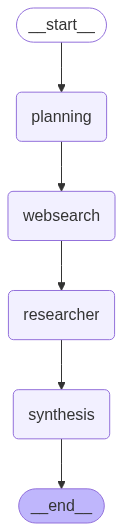

In [24]:
app

In [ ]:
import pprint
topic="The Role of Blockchain Technology in Supply Chain Management"
result=app.invoke({"research_topic":topic})

# pprint.pprint(result)


In [28]:
pprint.pprint(result['final_report'])

('## The Role of Blockchain Technology in Supply Chain Management\n'
 '\n'
 '**Abstract:** This paper examines the transformative potential of blockchain '
 'technology in revolutionizing supply chain management (SCM).  We analyze its '
 'impact on transparency, traceability, and efficiency, while also addressing '
 'crucial security and adoption challenges.  Findings suggest that while '
 'blockchain offers significant benefits, successful implementation requires '
 'careful consideration of security risks and a strategic approach to '
 'achieving widespread industry adoption.\n'
 '\n'
 '**Introduction:**  Global supply chains are complex networks characterized '
 'by multiple stakeholders, geographically dispersed operations, and '
 'information asymmetry.  This complexity often leads to inefficiencies, lack '
 'of transparency, and increased vulnerability to disruptions.  Blockchain '
 'technology, with its immutable ledger and shared data architecture, presents '
 'a promising solu

In [27]:
print(result['final_report'])

## The Role of Blockchain Technology in Supply Chain Management

**Abstract:** This paper examines the transformative potential of blockchain technology in revolutionizing supply chain management (SCM).  We analyze its impact on transparency, traceability, and efficiency, while also addressing crucial security and adoption challenges.  Findings suggest that while blockchain offers significant benefits, successful implementation requires careful consideration of security risks and a strategic approach to achieving widespread industry adoption.

**Introduction:**  Global supply chains are complex networks characterized by multiple stakeholders, geographically dispersed operations, and information asymmetry.  This complexity often leads to inefficiencies, lack of transparency, and increased vulnerability to disruptions.  Blockchain technology, with its immutable ledger and shared data architecture, presents a promising solution to these challenges. This paper explores the role of blockcha

In [29]:
topic="The Effects of Climate Change on Coastal Ecosystems"
result=app.invoke({"research_topic":topic})




In [30]:
pprint.pprint(result['final_report'])

('## The Devastating Impacts of Climate Change on Coastal Ecosystems\n'
 '\n'
 '**Introduction:**\n'
 '\n'
 'Coastal ecosystems, encompassing vital habitats like wetlands and marine '
 'environments, provide crucial ecosystem services, including shoreline '
 'protection, fisheries, and carbon sequestration.  However, these ecosystems '
 'are increasingly threatened by climate change, primarily through sea level '
 'rise (SLR) and ocean acidification. This paper examines the multifaceted '
 'impacts of climate change on coastal ecosystems, synthesizing research '
 'findings on the detrimental effects of SLR on coastal wetlands and the '
 'consequences of ocean acidification on marine biodiversity and ecosystem '
 'services.\n'
 '\n'
 '**Section 1: The Impact of Sea Level Rise on Coastal Wetlands**\n'
 '\n'
 'Findings 1 and 3 converge to highlight the catastrophic effects of SLR on '
 'coastal wetlands.  Rising sea levels fundamentally alter the hydrological '
 'regime of these ecosystem

In [31]:
topic="The Evolution of Cybersecurity Threats and Defense Strategies"
result=app.invoke({"research_topic":topic})


In [32]:
pprint.pprint(result['final_report'])

('## The Evolution of Cybersecurity Threats and Defense Strategies\n'
 '\n'
 '**Abstract:** This paper examines the evolution of cybersecurity threats and '
 'the corresponding adaptations in defense strategies.  Analyzing prominent '
 'attacks from the Morris Worm to recent supply chain compromises, we '
 'demonstrate a clear shift from simple network intrusions to highly '
 'sophisticated, targeted attacks with significant real-world consequences.  '
 'The paper further explores the transition from basic security measures like '
 'traditional firewalls to more integrated and AI-powered solutions, '
 'highlighting the necessity of a holistic approach to cybersecurity defense '
 'in the face of evolving threats.\n'
 '\n'
 '**Introduction:** The digital landscape has witnessed a dramatic escalation '
 'in the sophistication and impact of cybersecurity threats.  From the '
 'relatively simple exploits of early network worms to the highly targeted and '
 'disruptive attacks of today, the 